In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/Entrenamieto_ECI_2020.csv")
df.shape

In [2]:
df['Pricing, Delivery_Terms_Quote_Appr'] = df['Pricing, Delivery_Terms_Quote_Appr'].astype('boolean')
df['Pricing, Delivery_Terms_Approved'] = df['Pricing, Delivery_Terms_Approved'].astype('boolean')
df['Bureaucratic_Code_0_Approval'] = df['Bureaucratic_Code_0_Approval'].astype('boolean')
df['Bureaucratic_Code_0_Approved'] = df['Bureaucratic_Code_0_Approved'].astype('boolean')

df['Total_Amount_Currency'] = df['Total_Amount_Currency'].astype('category')
df['Stage'] = df['Stage'].astype('category')
df['Region'] = df['Region'].astype('category')

df['Source '] = df['Source '].astype('category')
df['Billing_Country'] = df['Billing_Country'].astype('category')
df['Account_Name'] = df['Account_Name'].astype('category')
df['Opportunity_Name'] = df['Opportunity_Name'].astype('category')
df['Account_Owner'] = df['Account_Owner'].astype('category')
df['Delivery_Terms'] = df['Delivery_Terms'].astype('category')
df['Product_Family'] = df['Product_Family'].astype('category')
df['Product_Name'] = df['Product_Name'].astype('category')
df['Brand'] = df['Brand'].astype('category')

df['Last_Modified_By'] = df['Last_Modified_By'].astype('category')
df['Opportunity_Owner'] = df['Opportunity_Owner'].astype('category')
df['Territory'] = df['Territory'].astype('category')

df['Total_Taxable_Amount_Currency'] = df['Total_Taxable_Amount_Currency'].astype('category')
df['Bureaucratic_Code'] = df['Bureaucratic_Code'].astype('category')
df['Account_Type'] = df['Account_Type'].astype('category')
df['Quote_Type'] = df['Quote_Type'].astype('category')
df['Opportunity_Type'] = df['Opportunity_Type'].astype('category')
df['Product_Type'] = df['Product_Type'].astype('category')
df['Product_Category_B'] = df['Product_Category_B'].astype('category')
df['Currency'] = df['Currency'].astype('category')
df['ASP_Currency'] = df['ASP_Currency'].astype('category')
df['Delivery_Quarter'] = df['Delivery_Quarter'].astype('category')
df['Delivery_Year'] = df['Delivery_Year'].astype('category')

#Normalizo Fechas
df['Account_Created_Date'] = pd.to_datetime(df['Account_Created_Date'], format='%m/%d/%Y')
df['Last_Modified_Date'] = pd.to_datetime(df['Last_Modified_Date'], format='%m/%d/%Y')
df['Quote_Expiry_Date'] = pd.to_datetime(df['Quote_Expiry_Date'], format='%m/%d/%Y')
df['Planned_Delivery_Start_Date'] = pd.to_datetime(df['Planned_Delivery_Start_Date'], format='%m/%d/%Y')
df['Planned_Delivery_End_Date'] = pd.to_datetime(df['Planned_Delivery_End_Date'], format='%m/%d/%Y')
df['Account_Created_Date'] = pd.to_datetime(df['Account_Created_Date'], format='%m/%d/%Y')
df['Opportunity_Created_Date'] = pd.to_datetime(df['Opportunity_Created_Date'], format='%m/%d/%Y')
#Normalizo Floats
df['ASP'] = pd.to_numeric(df['ASP'],downcast='float',errors='coerce')
df['ASP_(converted)'] = pd.to_numeric(df['ASP_(converted)'],downcast='float',errors='coerce')
df['Total_Amount'] = pd.to_numeric(df['Total_Amount'],downcast='float',errors='coerce')
df['Total_Taxable_Amount'] = pd.to_numeric(df['Total_Taxable_Amount'],downcast='float',errors='coerce')
df['ASP'] = pd.to_numeric(df['ASP'],downcast='float',errors='coerce')

df['Sales_Contract_No'] = pd.to_numeric(df['Sales_Contract_No'],downcast='integer',errors='coerce')

In [3]:
# columnas con valor unico -> no aportan informacion
nunique = df.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
cols_to_drop

Index(['Submitted_for_Approval', 'Last_Activity', 'ASP_(converted)_Currency',
       'Actual_Delivery_Date', 'Prod_Category_A'],
      dtype='object')

In [4]:
# Elimino columnas que no aporta informacion
df.drop(cols_to_drop, axis=1, inplace = True)
df.shape

(16947, 47)

In [5]:
# Las propuestas diferentes a Closed Won o Closed Lost representan una infima cantidad (64/16mil)
# Son propuestas en curso que estan todavia en diferententes fases y no aportan informacion para predecir
# si la venta se produce o no
# son la moyoria del 2019 o 2020, y una que quedo colgada del 2017
df[(df['Stage']!= 'Closed Lost') & (df['Stage']!= 'Closed Won') ].shape

(64, 47)

In [6]:
# elimino esas 64 columnas
df = df[(df['Stage']== 'Closed Lost') | (df['Stage']== 'Closed Won') ]

In [ ]:
df = df[df.Total_Amount.notna()]
df.Price.value_counts()

Como se puede ver, en el 15859 de 16824 registros el valor es None, si contamos tambien los que tiene Other estamos hablando de 16468/16824.
Por lo que podriamos no utilizar

In [ ]:
df.Size.value_counts()

En este caso, podemos ver que la columna Size, tiene informacion sonbre apenas el 3.47%(586/16888b) de los datos, con lo que tampoco la tendremos en cuenta.

In [9]:
df.drop('Size',
  axis='columns', inplace=True)
df.drop('Price',
  axis='columns', inplace=True)

In [10]:
df.to_csv(r'/content/train_clean.csv', index = False)
df_clean = pd.read_csv("/content/train_clean.csv")
df_clean.shape

(16824, 45)

In [12]:
df_closed_lost = df[df['Stage'] == 'Closed Lost']
df_closed_won = df[df['Stage'] == 'Closed Won']

df_region_ganados_y_perdidos = pd.concat([df_closed_lost.groupby(['Opportunity_Type']).size(),df_closed_won.groupby(['Opportunity_Type']).size()], axis = 1)
col_rename = {0:'casos perdidos', 1: 'casos ganados'}
df_region_ganados_y_perdidos = df_region_ganados_y_perdidos.rename( columns = col_rename)
df_region_ganados_y_perdidos = df_region_ganados_y_perdidos[(df_region_ganados_y_perdidos['casos perdidos'] + df_region_ganados_y_perdidos['casos ganados']) > 300]
df_region_ganados_y_perdidos

,casos perdidos,casos ganados
Opportunity_Type,,
Opportunity_Type_1,3141,3617
Opportunity_Type_19,1456,399
Opportunity_Type_7,1819,3941
Opportunity_Type_8,428,1024


Text(0.5, 1.05, 'Casos ganados y perdidos según el tipo de oportunidad\n')

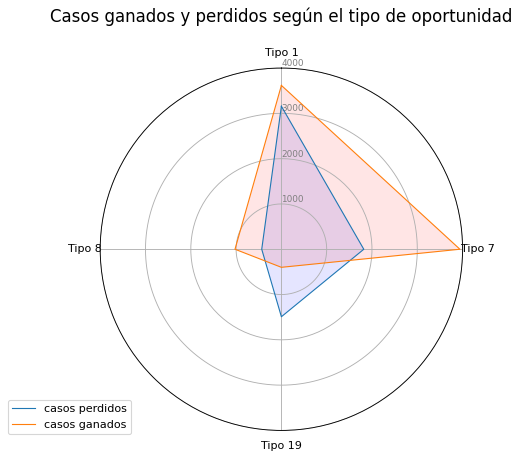

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k') 

df = pd.DataFrame({
'group': ['A','B'],
'Tipo 1': [3157, 3617],
'Tipo 7': [1819, 3941],
'Tipo 19': [1490, 399],
'Tipo 8': [434, 1024]
})

categories=list(df)[1:]
N = len(categories)
 
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
ax = plt.subplot(111, polar=True)
 
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
plt.xticks(angles[:-1], categories)
 
ax.set_rlabel_position(0)
plt.yticks([1000,2000,3000,4000], ["1000","2000","3000","4000"], color="grey", size=8)
plt.ylim(0,4000)

values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="casos perdidos")
ax.fill(angles, values, 'b', alpha=0.1)
 
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="casos ganados")
ax.fill(angles, values, 'r', alpha=0.1)
 
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Casos ganados y perdidos según el tipo de oportunidad\n', fontsize = 15)
